In [20]:
# import sys  
# !{sys.executable} -m pip install scipy
from typing import Tuple
import numpy as np
from math import log, pi
from scipy import integrate
import matplotlib.pyplot as plt
import inspect

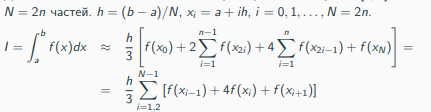   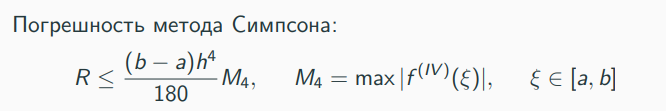

In [47]:
def simpson_integral(n: np.int64, func, interval: Tuple[np.float64, np.float64]):
    N = n if n % 2 == 0 else n + 1
    a, b = interval
    h = (b - a) / N

    x = np.linspace(a, b, N+1)
    y = []
    for i in range(N+1):
        y.append(func(x[i]))
        
    integral = y[0] + 4 * np.sum(y[1:N:2]) + 2 * np.sum(y[2:N-1:2]) + y[-1]
    return h / 3 * integral

In [22]:
# def gaussian_integral(n: np.int64, func, interval: Tuple[np.float64, np.float64]):
#     a = interval[0]
#     b = interval[1]
#     [x,w] = p_roots(n+1)
#     G=0.5*(b-a)*sum(w*func(0.5*(b-a)*x+0.5*(b+a)))
#     return G

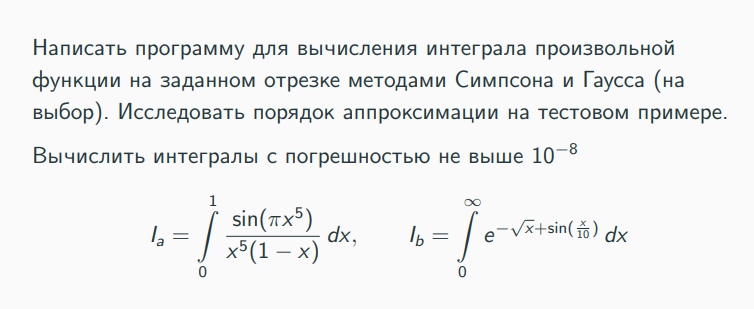

In [44]:
shift = 1e-16
func1 = lambda x: np.pi if x == 0 else np.pi*5 if x == 1 else np.sin(np.pi * x**5) / (x**5 * (1 - x))
func1_interval = (0, 1)


func2_infinite = lambda x: np.exp(-np.sqrt(x) + np.sin(x / 10))
func2 = lambda x: func2_infinite(x / (1 - x)) / (1 - x)**2
func2_interval = (0 + shift, 1 - shift)


func3 = lambda x: np.sin(x)
func3_interval = (0, np.pi)

In [24]:
def get_approx_order(func, method, interval: Tuple[np.float64, np.float64], n: np.int64, r: np.int64):
    test_integral = integrate.quad(func, interval[0], interval[1])[0]
    
    h_p = abs(method(n // r, func, interval) - test_integral)
    h_p = h_p if h_p != 0 else np.finfo(np.float64).eps
    _2h_p = abs(method(n, func, interval) - test_integral)
    _2h_p = _2h_p if _2h_p != 0 else np.finfo(np.float64).eps
    
    return abs(log(h_p / _2h_p, r))

In [42]:
def plot_func(func, func_interval):
    x = np.linspace(func_interval[0], func_interval[1], 1000)
    y = []
    for i in range(1000):
        y.append(func(x[i]))

    plt.plot(x, y, label=inspect.getsourcelines(func)[0][0])
    plt.title("f(x)")
    plt.grid(True) 
    plt.legend()
    plt.show()

In [26]:
def method_error_plot(method, func, func_interval, method_result, accuracy=1e-8, num=50, max_n=10):
    n_values = np.int64(np.exp(np.linspace(0, max_n, num=num)))
    method_result = integrate.quad(func, func_interval[0], func_interval[1])[0]
    results = []
    for n in n_values:
        value = method(n, func, func_interval)
        results.append(value)

    differences = np.abs(method_result - results)

    plt.figure(figsize=(10, 6))
    plt.plot(n_values, differences)
    plt.axhline(y=accuracy, linestyle='-')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Разница в результатах интеграла по методу Симпсона в зависимости от числа разбиений')
    plt.show()

    return n_values[np.where(differences < accuracy)[0][0]]

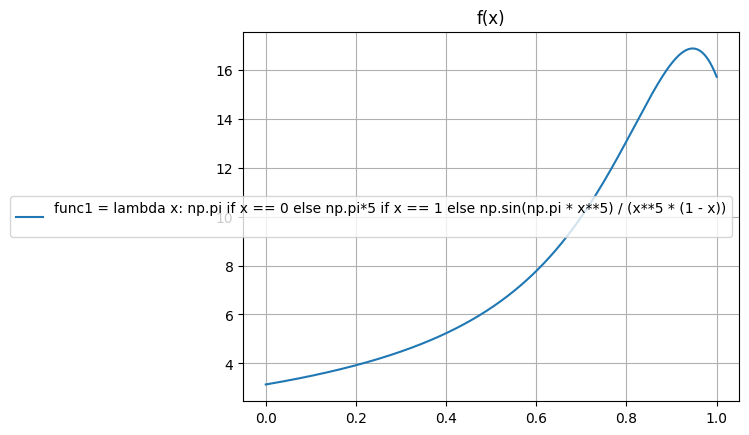

In [45]:
plot_func(func1, func1_interval)

In [48]:
simpson_result = simpson_integral(np.int64(2e4), func1, func1_interval)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
simpson_approximation_order = get_approx_order(func1, simpson_integral, func1_interval, 1000, 2)

In [ ]:
min_n_simpson = method_error_plot(simpson_integral, func1, func1_interval, integrate.quad(func1, func1_interval[0], func1_interval[1])[0], num=40, max_n=19)

In [ ]:
print(f"Simpson's result = {simpson_result}")
print(f"Minimal n for simpson to get an accuracy = {min_n_simpson}")
print(f"Approximation order = {simpson_approximation_order}")

Simpson's result = 8.034910676579463
Minimal n for simpson to get an accuracy = 67365328
Approximation order = 0.9999993706331725


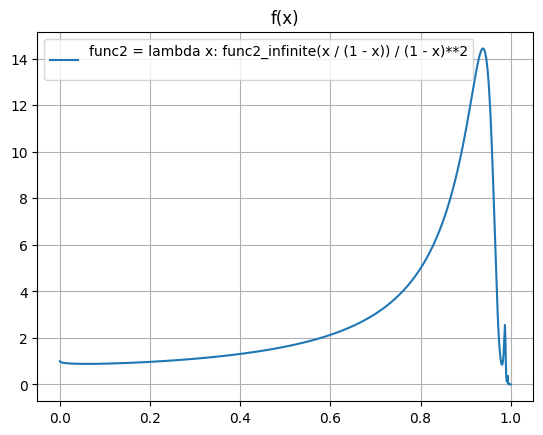

In [ ]:
plot_func(func2, func2_interval)

In [ ]:
simpson_result = simpson_integral(np.int64(4e8), func2, func2_interval)

In [ ]:
simpson_approximation_order = get_approx_order(func2, simpson_integral, func2_interval, 100000, 2)

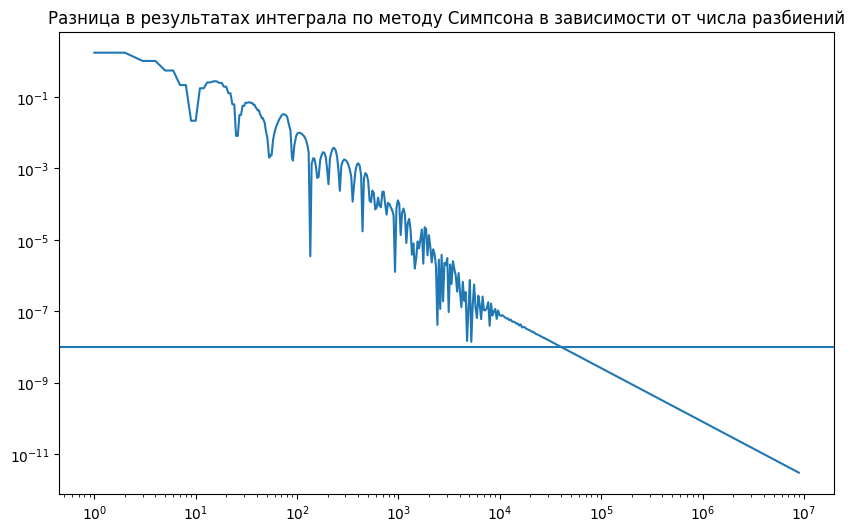

In [ ]:
min_n_simpson = method_error_plot(simpson_integral, func2, func2_interval, simpson_result, num=500, max_n=16)

In [ ]:
print(f"Simpson's result = {simpson_result}")
print(f"Minimal n for simpson to get an accuracy = {min_n_simpson}")
print(f"Approximation order = {simpson_approximation_order}")

Simpson's result = 2.981003452558347
Minimal n for simpson to get an accuracy = 40669
Approximation order = 1.580461611166948


In [ ]:
simpson_result = simpson_integral(np.int64(1e6), func3, func3_interval)

In [ ]:
simpson_approximation_order = get_approx_order(func3, simpson_integral, func3_interval, 1000, 2)

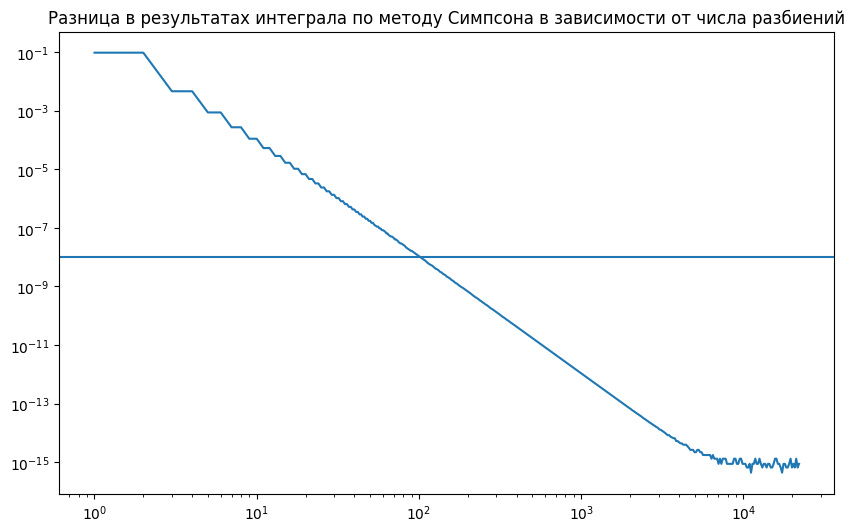

104

In [ ]:
method_error_plot(simpson_integral, func3, func3_interval, simpson_result, num=500)

In [ ]:
simpson_approximation_order

4.000110995040835